In [1]:
from math import pi
from pathlib import Path

import numpy as np
import pandas as pd

from cowerc_adsorption import (
    PhysicalParams,
    Simulation,
    ExperimentalBreakthroughData,
    plot_btc_and_data,
)

In [2]:
excel_file = Path("../../.data/Data and Column Properties.xlsx")
sheet_name = "WW All Contaminants 0.35-min"

In [3]:
# Read Emma's excel report
xls_setup = pd.read_excel(excel_file, sheet_name=sheet_name, nrows=18, usecols="A:B", index_col=0)
setup = xls_setup.to_dict()["Unnamed: 1"]

xls_setup

,Unnamed: 1
Design Parameters,
Column Diameter (cm),0.660000
Column Area (cm^2),0.340000
Particle Size (cm),0.016800
Column Diameter/Particle Size Ratio,39.285714
Reynold's Number,0.270000
Bed Voidage (ε),0.500000
Hydraulic Loading Rate (cm/s),0.080000
EBCT,0.260000
Flow Rate (mL/s),0.028000


In [4]:
xls_influent = pd.read_excel(excel_file, sheet_name=sheet_name, skiprows=11, nrows=5, usecols="D:J")
xls_influent.set_index("Unnamed: 3", inplace=True)

print("Influent in ng/L")
xls_influent

Influent in ng/L


,PFOA,PFHxA,PFHxS,BEZ,DCF,PFBA
Unnamed: 3,,,,,,
INF 1,356.500000,571.500000,324.0,376.500000,715.0,529.000000
INF 2,347.000000,499.500000,340.5,392.500000,786.5,494.000000
INF 3,387.500000,556.000000,397.5,394.000000,579.0,596.500000
inf 4 - 11 and 12,338.000000,242.000000,237.0,157.000000,246.0,585.000000
INF AVG,363.666667,542.333333,354.0,387.666667,693.5,539.833333


In [5]:
xls_btc = pd.read_excel(excel_file, sheet_name=sheet_name, header=19, usecols="A:Q")
xls_btc.rename(columns=lambda x: x.strip(), inplace=True)
xls_btc

,Sample ID,Time (min.),Cum. Vol.,Bed Vol Passed (BV),Specific Throughput,PFOA,PFOA C/C0,PFHxA,PFHxA C/C0,PFHxS,PFHxS C/C0,BEZ,BEZ C/C0,DCF,DCF C/C0,PFBA,PFBA C/C0
0,1.0,56.454545,93.15,186.30,877.118644,0.000,0.000000,0.000000,0.000000,0.000,0.000000,9.705000,0.025034,0.000000,0.000000,0.000000,0.000000
1,2.0,285.545455,471.15,942.30,4436.440678,0.000,0.000000,0.000000,0.000000,0.000,0.000000,15.750000,0.040628,5.900000,0.008508,12.100000,0.022414
2,3.0,794.636364,1311.15,2622.30,12346.045198,0.000,0.000000,0.000000,0.000000,0.000,0.000000,67.200000,0.173345,9.750000,0.014059,448.000000,0.829886
3,4.0,1343.727273,2217.15,4434.30,20877.118644,0.000,0.000000,27.200000,0.050154,0.000,0.000000,159.500000,0.411436,14.135000,0.020382,401.500000,0.743748
4,5.0,2675.272727,4414.20,8828.40,41564.971751,0.000,0.000000,168.666667,0.311002,0.000,0.000000,307.333333,0.792777,262.666667,0.378755,426.666667,0.790367
5,6.0,3977.090909,6562.20,13124.40,61790.960452,5.783,0.015902,289.666667,0.534112,5.500,0.015537,410.666667,1.059329,390.333333,0.562845,568.333333,1.052794
6,7.0,5649.818182,9322.20,18644.40,87779.661017,23.850,0.065582,428.500000,0.790104,10.885,0.030749,360.500000,0.929923,503.000000,0.725306,465.000000,0.861377
7,7.5,7104.363636,11722.20,23444.40,110378.531073,66.400,0.182585,572.500000,1.055624,23.700,0.066949,350.500000,0.904127,522.000000,0.752704,556.500000,1.030874
8,8.0,7692.242424,12692.20,25384.40,119512.241055,91.100,0.250504,566.500000,1.044561,35.850,0.101271,336.000000,0.866724,605.500000,0.873107,416.500000,0.771534
9,9.0,8821.563636,14555.58,29111.16,137058.192090,105.750,0.290788,544.000000,1.003073,38.800,0.109605,300.000000,0.773861,519.500000,0.749099,445.000000,0.824328


In [6]:
porosity = setup["Bed Voidage (ε)"]
lenght = setup["Bed Length (cm)"]

area = 0.25 * pi * setup["Column Diameter (cm)"] ** 2  # cm²
pore_velocity = setup["Flow Rate (mL/min)"] / (area * porosity)  # cm/min

print(f"Porosity: {porosity:.2f}")
print(f"Length: {lenght:.2f}")
print(f"Pore velocity: {pore_velocity:.4f}")

Porosity: 0.50
Length: 1.71
Pore velocity: 9.6458


In [7]:
contaminants = ["PFBA", "BEZ", "PFHxA", "DCF", "PFOA", "PFHxS"]
molecular_weight = {"PFBA": 214.04, "BEZ": 361.8, "PFHxA": 314.05, "DCF": 296.1, "PFOA": 414.1, "PFHxS": 400.11}

c_0 = xls_influent.loc["INF AVG"][contaminants].to_numpy()  # ng/L
c_0 = c_0 / np.array(list(molecular_weight.values()))  # nmol/L

print("Initial concentrations [nM]:")
for k, v in zip(contaminants, c_0):
    print(f"{k:>6}: {v:.3f}")

Initial concentrations [nM]:
  PFBA: 2.522
   BEZ: 1.071
 PFHxA: 1.727
   DCF: 2.342
  PFOA: 0.878
 PFHxS: 0.885


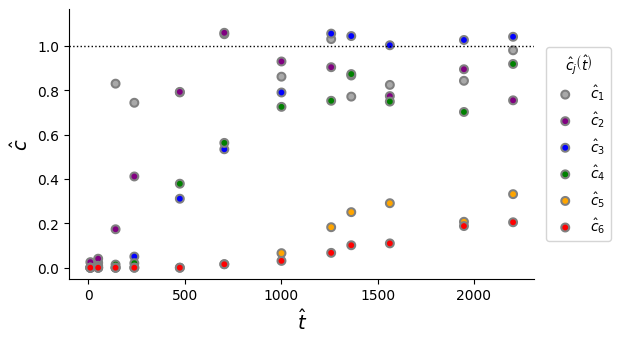

In [8]:
experimental_data = ExperimentalBreakthroughData(
    time=np.round((xls_btc["Time (min.)"] * lenght / pore_velocity), 2).to_numpy(),
    conc=xls_btc[[f"{k} C/C0" for k in contaminants]].to_numpy().T,
    c_0=c_0,
)

experimental_data.plot_breakthrough()

In [9]:
print(", ".join(f"{x:.3f}" for x in experimental_data.c_0))
print(", ".join(f"{x:.2f}" for x in experimental_data.time))

2.522, 1.071, 1.727, 2.342, 0.878, 0.885
10.01, 50.62, 140.87, 238.22, 474.27, 705.06, 1001.60, 1259.46, 1363.68, 1563.89, 1948.33, 2203.16


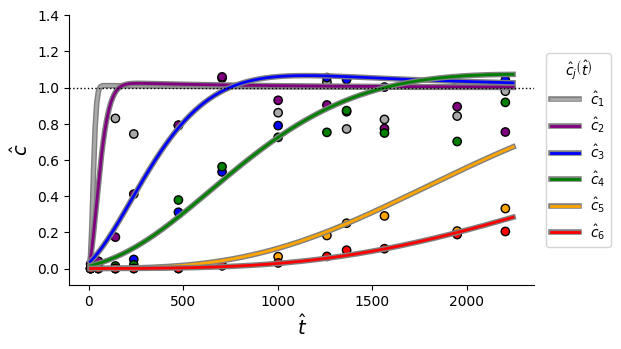

In [10]:
# Trying out some arbitrary parameters

p = PhysicalParams(
    L=lenght,  # cm
    v=pore_velocity,  # cm/min
    n=porosity,  # -
    sm=6.6e3,  # nmol/cm³
    k_ads=(50, 25, 20, 25, 52, 60),  # 1/min
    k_des=(2, 0.4, 0.05, 0.022, 0.015, 0.01),  # 1/min
    C_0=c_0,
)

sim = Simulation(**p.nondim)
sim.end_time = 2250
sim.write_every = 1000
sim.cfl = 0.85
sim.solve()

display(plot_btc_and_data(sim, experimental_data))

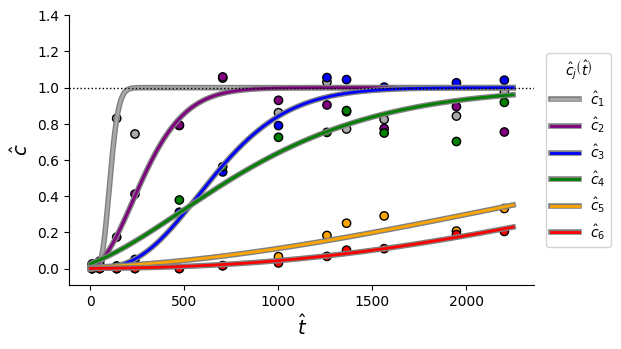

In [ ]:
# Fitting data using OSTRICH

optimal_parameter_set = [
    8.295149e00,
    2.083706e00,
    1.521587e00,
    1.739685e00,
    1.320373e00,
    1.469682e00,
    1.647347e00,
    5.036739e-02,
    -9.659092e-01,
    -1.096363e00,
    -1.625378e00,
    -2.049188e00,
    -1.929912e00,
]

optimal_parameter_set = [10**k for k in optimal_parameter_set]

p = PhysicalParams(
    L=lenght,
    v=pore_velocity,
    n=porosity,
    sm=optimal_parameter_set[0],
    k_ads=optimal_parameter_set[1:7],
    k_des=optimal_parameter_set[7:],
    C_0=experimental_data.c_0,
)

sim = Simulation(**p.nondim)
sim.end_time = 2250
sim.write_every = 1000
sim.cfl = 0.80
sim.solve()

display(plot_btc_and_data(sim, experimental_data))

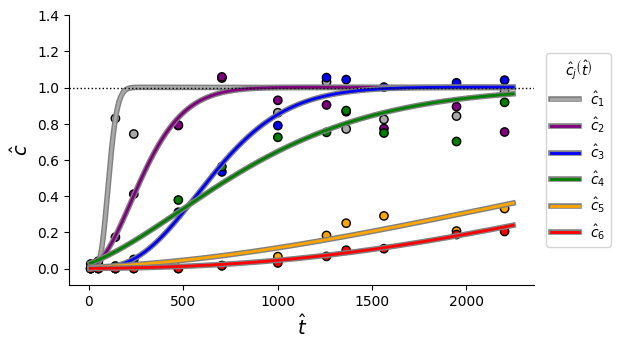

In [12]:
# Fitting data using OSTRICH

optimal_parameter_set = [
    5.295149e00,
    2.083706e00,
    1.521587e00,
    1.739685e00,
    1.320373e00,
    1.469682e00,
    1.647347e00,
    5.036739e-02,
    -9.659092e-01,
    -1.096363e00,
    -1.625378e00,
    -2.049188e00,
    -1.929912e00,
]

optimal_parameter_set = [10**k for k in optimal_parameter_set]

p = PhysicalParams(
    L=lenght,
    v=pore_velocity,
    n=porosity,
    sm=optimal_parameter_set[0],
    k_ads=optimal_parameter_set[1:7],
    k_des=optimal_parameter_set[7:],
    C_0=experimental_data.c_0,
)

sim = Simulation(**p.nondim)
sim.end_time = 2250
sim.write_every = 1000
sim.cfl = 0.80
sim.solve()

display(plot_btc_and_data(sim, experimental_data))

In [13]:
display(p)

PhysicalParams(L=1.71, v=9.645754126781533, n=0.5, sm=197309.9561219747, k_ads=array([121.25677127,  33.23433552,  54.91424285,  20.91091323,
        29.49049077,  44.39632276]), k_des=array([1.12296802, 0.10816601, 0.08010083, 0.02369311, 0.00892919,
       0.01175136]), C_0=array([2.52211425, 1.07149438, 1.72690124, 2.34211415, 0.87820977,
       0.88475669]))

In [14]:
for k, v in p.nondim.items():
    print(f"{k}: {', '.join(map(lambda x: f'{x:.3E}', v))}")

Dam_ads: 2.150E+01, 5.892E+00, 9.735E+00, 3.707E+00, 5.228E+00, 7.871E+00
Dam_des: 1.991E-01, 1.918E-02, 1.420E-02, 4.200E-03, 1.583E-03, 2.083E-03
kappa: 6.391E-06, 2.715E-06, 4.376E-06, 5.935E-06, 2.225E-06, 2.242E-06
bc: 1.000E+00, 1.000E+00, 1.000E+00, 1.000E+00, 1.000E+00, 1.000E+00


In [15]:
len(sim.btc[0])

281